In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [163]:
#load the dataset
df=pd.read_csv("Churn_Modelling.csv")

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [162]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,300.0,1.749500,0.545700,37.348500,5.012800,76485.889288,1.530200,0.70550,100090.239881,0.203700
std,2886.89568,7.193619e+04,0.0,0.830433,0.497932,6.324638,2.892174,62397.405202,0.581654,0.45584,57510.492818,0.402769
min,1.00000,1.556570e+07,300.0,1.000000,0.000000,25.000000,0.000000,0.000000,1.000000,0.00000,11.580000,0.000000
25%,2500.75000,1.562853e+07,300.0,1.000000,0.000000,33.000000,3.000000,0.000000,1.000000,0.00000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,300.0,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,300.0,3.000000,1.000000,41.000000,7.000000,127644.240000,2.000000,1.00000,149388.247500,0.000000
max,10000.00000,1.581569e+07,300.0,3.000000,1.000000,50.000000,10.000000,250898.090000,4.000000,1.00000,199992.480000,1.000000


## UNIVARIATE ANALYSIS

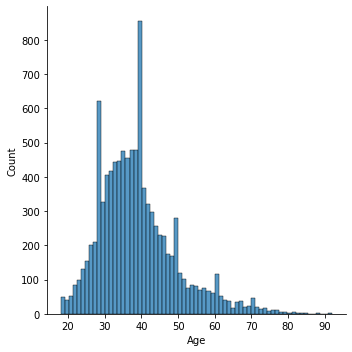

In [11]:
sns.displot(df["Age"])

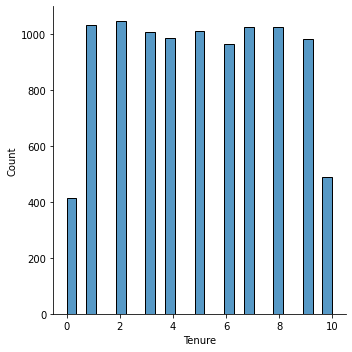

In [12]:
sns.displot(df["Tenure"])

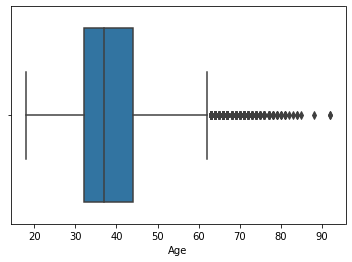

In [13]:
sns.boxplot(df["Age"])

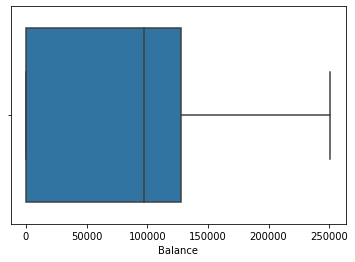

In [14]:
sns.boxplot(df["Balance"])

## BI-VARIATE ANALYSIS

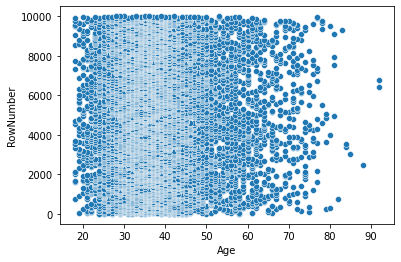

In [15]:
sns.scatterplot(x=df.Age,y=df.RowNumber)

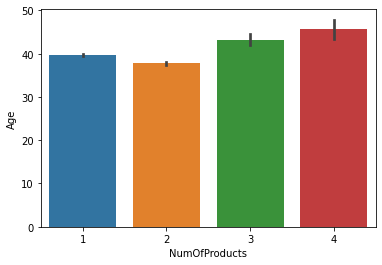

In [16]:
sns.barplot(df["NumOfProducts"],df["Age"])

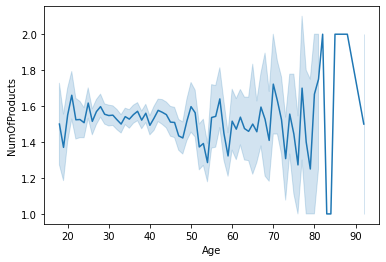

In [17]:
sns.lineplot(df["Age"],df["NumOfProducts"])

## MULTI-VARIATE ANALYSIS

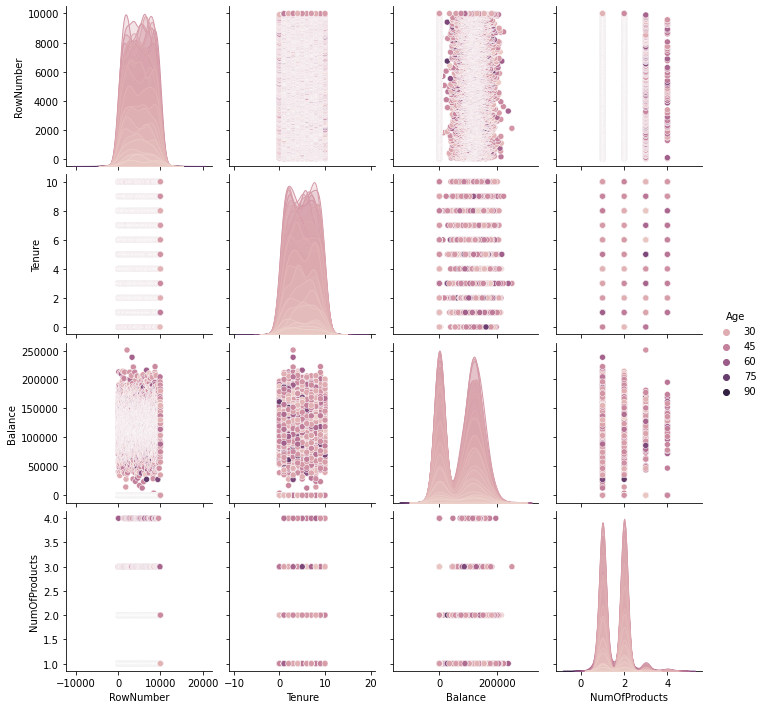

In [18]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]],hue="Age")

## Descriptive Statistics

In [165]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handling the missing values

In [43]:
data=pd.DataFrame({"a":[1,2,np.nan],"b":[1,np.nan,np.nan],"c":[1,2,4]})
data

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,4


In [44]:
data.isnull().any()

a     True
b     True
c    False
dtype: bool

In [45]:
data.isnull().sum()

a    1
b    2
c    0
dtype: int64

In [46]:
data.fillna(value = "S")

,a,b,c
0,1.0,1.0,1
1,2.0,S,2
2,S,S,4


In [47]:
data["a"].mean()

1.5

In [48]:
data["a"].median()

1.5

In [49]:
data["a"].fillna(df["a"].mean(),inplace=True)

In [50]:
data

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,1.5,NaN,4


## Find the outliers and replace the outliers

In [109]:
qnt=df.quantile(q=(0.25,0.75))

In [166]:
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,300.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,300.0,40.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [111]:
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore             0.0000
Age                     8.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [112]:
lower = qnt.loc[0.25] - 1.5*iqr
lower

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.000000e+02
Age                2.000000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [113]:
upper = qnt.loc[0.75] + 1.5 * iqr
upper

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        3.000000e+02
Age                5.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

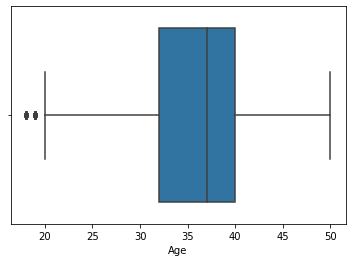

In [114]:
sns.boxplot(df["Age"])

In [146]:
df["Age"]=np.where(df["Age"]<25,50,df["Age"])

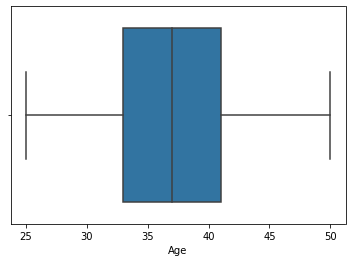

In [121]:
sns.boxplot(df["Age"])

## Check for Categorical columns and perform encoding.

In [167]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [169]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)
df["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)

In [170]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,1,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,3,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,1,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,1,1,27,2,134603.88,1,1,1,71725.73,0


## Split the data into dependent and independent variables.

In [171]:
y = df["Surname"]

In [172]:
x=df.drop(columns=["Surname"],axis=1)

In [173]:
x.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Scale the independent variables

In [174]:
names=x.columns
names

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [175]:
from sklearn.preprocessing import scale

In [176]:
X=scale(x)

In [177]:
X

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.60653412, -0.44003595, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -0.99588476, -1.53679418, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761, -0.87055909,  1.46377078, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [179]:
x = pd.DataFrame(X,columns = names )
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.326221,-0.902587,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.440036,0.301665,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,-1.536794,-0.902587,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.501521,-0.902587,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,2.063884,0.301665,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,-0.902587,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,1.730838,-1.682806,-1.391939,-0.902587,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,1.731185,-1.479282,0.604988,-0.902587,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.731531,-0.119356,1.256835,1.505917,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


## Split the data into training and testing

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [182]:
x_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,0.827747,-0.195066,0.170424,0.301665,-1.095988,-0.469311,-0.004426,-1.225848,0.807737,0.646092,-1.030670,1.108382,-0.505775
9275,1.481077,0.810821,-2.312802,1.505917,0.912419,0.293517,-1.387538,-0.012892,-0.911583,0.646092,0.970243,-0.747592,-0.505775
2995,-0.694379,-1.507642,-1.195351,-0.902587,-1.095988,-0.946079,-1.041760,0.575076,-0.911583,0.646092,-1.030670,1.487464,-0.505775
5316,0.109639,1.243462,0.035916,0.301665,0.912419,0.102810,-0.004426,0.467955,-0.911583,0.646092,-1.030670,1.278558,-0.505775
356,-1.608556,-1.100775,2.063884,0.301665,-1.095988,1.723821,1.032908,0.806010,0.807737,0.646092,0.970243,0.560069,-0.505775


In [184]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 13), (8000,), (2000, 13), (2000,))